# **LAB 2 - PART 2 Gradient Descent**

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from matplotlib.animation import FuncAnimation
# from Ipython.display import display, Image

### **Read file, Explore Data, Data Cleansing**

In [33]:
### START CODE HERE ###
df = pd.read_csv('./Gradient-Descent-example-data.csv')
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment
0,1,-1,846
1,2,-4,424
2,3,2,1560
3,4,-3,523
4,5,1,1012
5,6,-2,663
6,7,4,1624
7,8,5,1882
8,9,2,1263


### **Create a `Bitcoin Increment_standardize` columns**

In [34]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()

df['Bitcoin Increment_standardize'] = standardize_scaler.fit_transform(df[['Bitcoin Increment']])
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize
0,1,-1,846,-0.493265
1,2,-4,424,-1.351452
2,3,2,1560,0.958738
3,4,-3,523,-1.150124
4,5,1,1012,-0.155685
5,6,-2,663,-0.865418
6,7,4,1624,1.088890
7,8,5,1882,1.613563
8,9,2,1263,0.354753


### **Gradient Descent**

$$
h_{\theta} = \theta_1x + \theta_0 
\\
J(\theta) = (y-h{(x)})^2
\\
\theta_{j} \leftarrow \theta_{j} - \alpha \frac{\partial}{\partial \theta_{j}} J(\theta)
$$
Demonstrate a single step of Gradient Descent. Then plot the graph that shows the model before and after the update parameters

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 = 0.4, \theta_1 = 0.8, learning\ rate = 0.01$

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

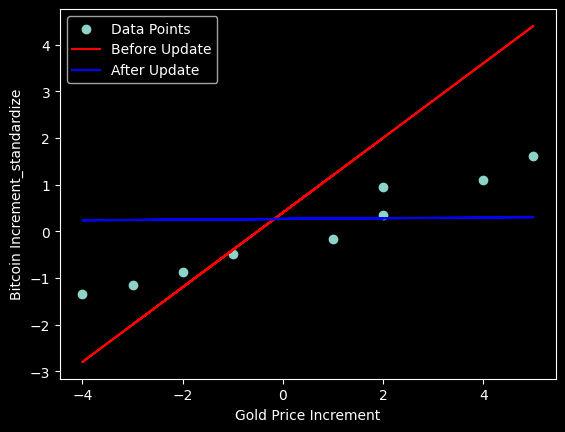

</details>

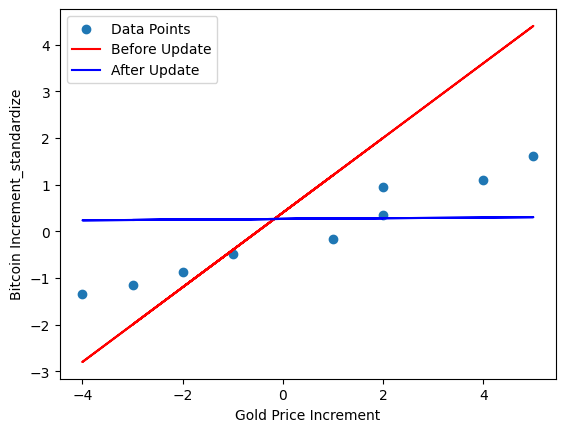

In [35]:
# ### START CODE HERE ###
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

h_before = theta_0 + theta_1*x
grad_J_theta_1 = np.sum(2*(y - (theta_0 + theta_1*x))*(-x))
grad_J_theta_0 = np.sum(2*(y - (theta_0 + theta_1*x))*(-1))
theta_1 = theta_1 - alpha*grad_J_theta_1
theta_0 = theta_0 - alpha*grad_J_theta_0
h_after = theta_0 + theta_1*x

grad_J_theta_1
# ### END CODE HERE ###

# Plot the graph
plt.scatter(x, y, label='Data Points')
plt.plot(x, h_before, color='red', label='Before Update')
plt.plot(x, h_after, color='blue', label='After Update')
plt.xlabel('Gold Price Increment')
plt.ylabel('Bitcoin Increment_standardize')
plt.legend()
plt.show()


Now let's create N iterations of gradient descent, <span style='color: orange;'>***print all parameters and loss every iteration***</span> then <span style='color: orange;'>***plot the loss history***</span> and <span style='color: orange;'>***save the animation to show the change of model in each iteration to .gif***</span>.

Let's  $x = Gold\ Price\ Increment, y = Bitcoin\ Increment\_standardize, \theta_0 \in [0,1], \theta_1 \in [0,1], learning\ rate = alpha$


In [36]:

def gradient_descent(N, x, y, theta_0=0.4, theta_1=0.8,alpha=0.01):
    loss_history = []

    fig, ax = plt.subplots()
    ax.scatter(x, y, label='Data Points')
    line, = ax.plot(x, theta_0 + theta_1 * x, color='red', label='Regression Model')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend()

    def update(i):
        nonlocal theta_0, theta_1
        h_before = theta_0 + theta_1 * x
        loss = np.mean((h_before - y) ** 2)
        loss_history.append(loss)
        grad_J_theta_1 = np.sum(2*(y - (theta_0 + theta_1*x))*(-x))
        grad_J_theta_0 = np.sum(2*(y - (theta_0 + theta_1*x))*(-1))
        theta_1 = theta_1 - alpha*grad_J_theta_1
        theta_0 = theta_0 - alpha*grad_J_theta_0
        h_after = theta_0 + theta_1 * x

        line.set_ydata(h_after)
        ax.set_title(f'Iteration: {i+1}')
    anim = FuncAnimation(fig, update, frames=N, interval=200)
    anim.save('animation.gif', writer='pillow')

    plt.figure()
    plt.plot(range(1, N+2), loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Loss History')
    plt.show()
    return theta_0, theta_1

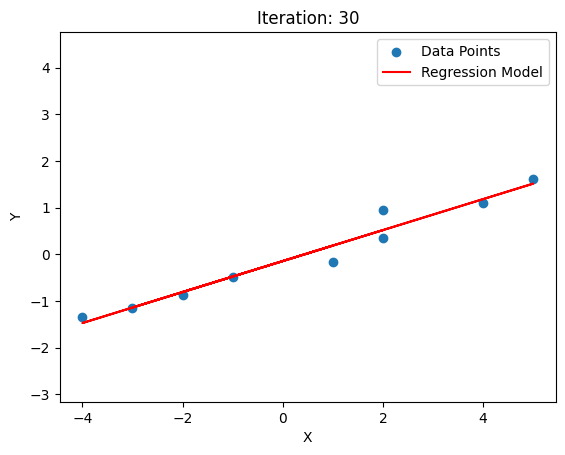

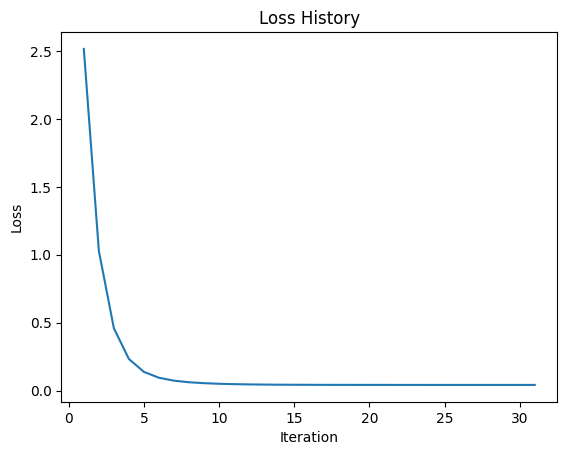

In [37]:
theta_0 = 0.4
theta_1 = 0.8
alpha = 0.01

y = df['Bitcoin Increment_standardize']
x = df['Gold Price Increment']

theta_0, theta_1 = gradient_descent(30, x, y)
# use  gradient_descent() here to estimate theta_0, theta_1 @all iterations

### Show Figure of scatter plot of data and regression model (Red line) at each iteration
Try figure animation using FuncAnimation()**

<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![SegmentLocal](./parameter_update_animation.gif "segment")

</details>


<img src="./animation.gif">


### Create the `Predicted_standardize` columns from the best parameters set

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize |
|----------------------|-------------------|-------------------------------|------------------------|
| -1                | 846                           | -0.493265              | -0.169845              |
| -4                | 424                           | -1.351452              | -1.063912              |
| 2                 | 1560                          | 0.958738               | 0.724223               |
| -3                | 523                           | -1.150124              | -0.765890              |



</details>

In [38]:
### START CODE HERE ###

df['Predicted_standardize'] = theta_0 + theta_1 * df['Gold Price Increment']

### END CODE HERE ###
df.head()

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize
0,1,-1,846,-0.493265,-0.478267
1,2,-4,424,-1.351452,-1.474244
2,3,2,1560,0.958738,0.517711
3,4,-3,523,-1.150124,-1.142252
4,5,1,1012,-0.155685,0.185718


Create the `Predicted` that inverse standardize of `Predicted_standardize`


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical, depending on your initial parameters value.</br>
<br>

| Gold Price Increment | Bitcoin Increment | Bitcoin Increment_standardize | Predicted_standardize | Predicted       |
|----------------------|-------------------|-------------------------------|------------------------|-----------------|
| -1                | 846                           | -0.493265              | -0.239102	   | 970.981043| 1005.037081     |
| -4                | 424                           | -1.351452              | -1.148680	   | 523.710247     |
| 2                 | 1560                          | 0.958738               | 0.670476	       | 1418.251840     |
| -3                | 523                           | -1.150124              | -0.845487	   | 672.800513     |



</details>

In [39]:
### START CODE HERE ###
df['Predicted_standardize'] = theta_0 + theta_1 * df['Gold Price Increment']
df['Predicted'] = standardize_scaler.inverse_transform(df[['Predicted_standardize']])
### END CODE HERE ###
df

,No,Gold Price Increment,Bitcoin Increment,Bitcoin Increment_standardize,Predicted_standardize,Predicted
0,1,-1,846,-0.493265,-0.478267,853.375377
1,2,-4,424,-1.351452,-1.474244,363.619035
2,3,2,1560,0.958738,0.517711,1343.131718
3,4,-3,523,-1.150124,-1.142252,526.871149
4,5,1,1012,-0.155685,0.185718,1179.879604
5,6,-2,663,-0.865418,-0.810259,690.123263
6,7,4,1624,1.088890,1.181696,1669.635946
7,8,5,1882,1.613563,1.513688,1832.888060
8,9,2,1263,0.354753,0.517711,1343.131718


## Question
1. What would be the iteration that gives the best parameters?
2. What are the best regression model parameters?
3. Show regression model equation of best parameters compared to the regression model equation from the last iteration (#30) 

# Ans
1. Around 7 iteration
2. at iteration 30 because the more iteration the less of loss
3. at 7 iteration

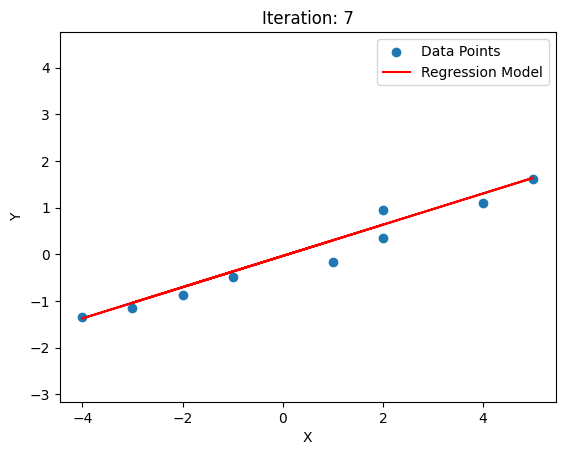

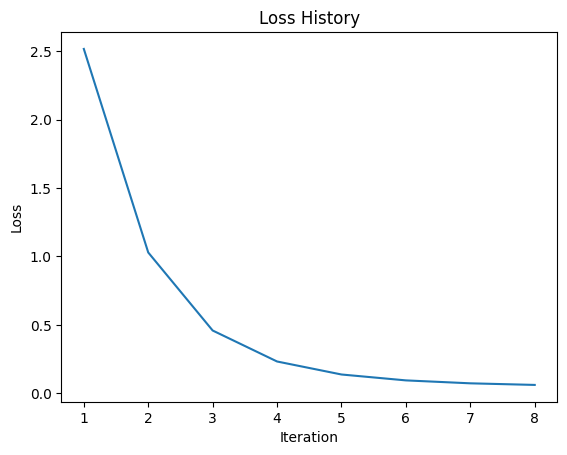

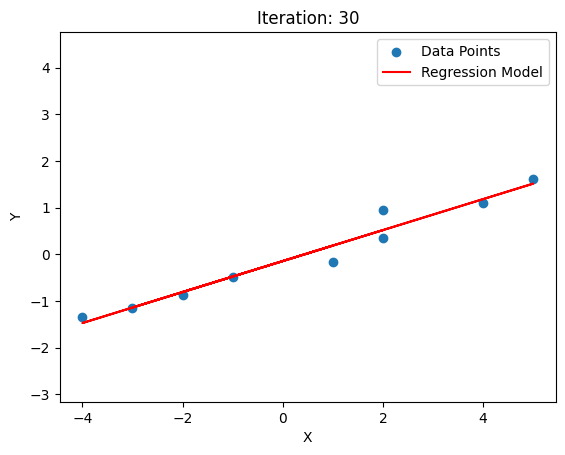

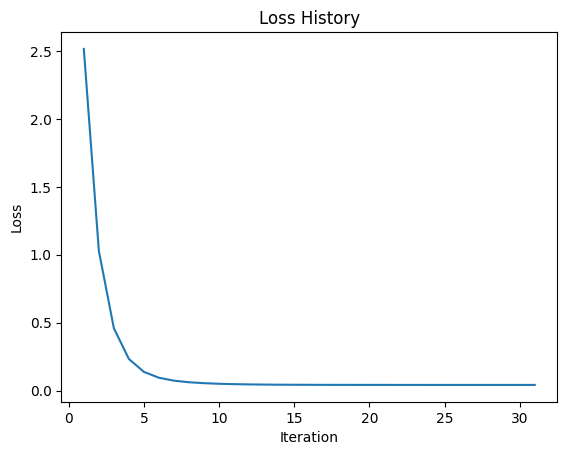

-0.14627422708818702 0.33199248138664034


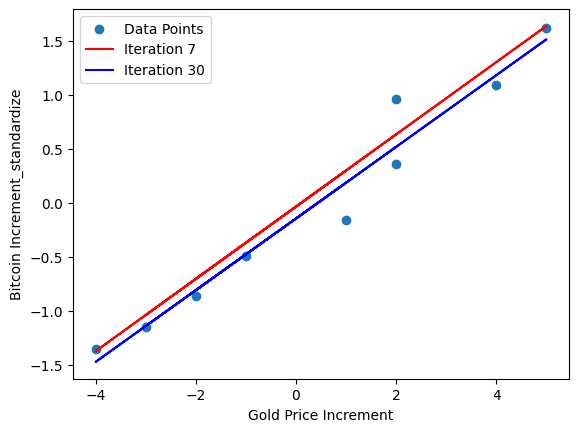

In [40]:

# at iteration 7
theta_0_7, theta_1_7 = gradient_descent(7, x, y)
theta_0_30, theta_1_30 = gradient_descent(30, x, y)
h_7 = theta_0_7 + theta_1_7 * x
h_30 = theta_0_30 + theta_1_30 * x
print(theta_0_30, theta_1_30)

plt.scatter(x, y, label='Data Points')
plt.plot(x, h_7, color='red', label='Iteration 7')
plt.plot(x, h_30, color='blue', label='Iteration 30')
plt.xlabel('Gold Price Increment')
plt.ylabel('Bitcoin Increment_standardize')
plt.legend()
plt.show()